# Manifold Learning for EDA - MNIST Digits.

Little lesson about how to visualize data for EDA with manifold learning technics.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.manifold import Isomap
from matplotlib import offsetbox
import numpy as np
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784')
mnist.data.shape

## Load dataset to data and target and visualize

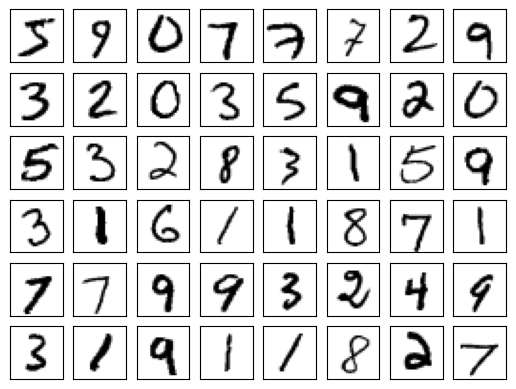

In [8]:
mnist_data = np.asarray(mnist.data)
mnist_target = np.asarray(mnist.target, dtype=int)

fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist_data[1250 * i].reshape(28, 28), cmap='gray_r')

## Select only 1/30 part of data for fast review.

C:\Users\idirt\AppData\Local\Temp\ipykernel_2716\1787837217.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))


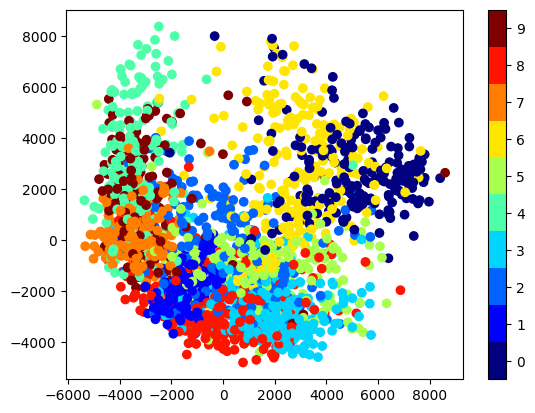

In [9]:
# Use only 1/30 of the data: full dataset takes a long time!
data = mnist_data[::30]
target = mnist_target[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(data)

plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)

## Create func plot_component for visualize data

In [11]:
from matplotlib import offsetbox


def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()

    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                proj[i])
            ax.add_artist(imagebox)

## Now we can see anomalies or strange examples for one target from our digits dataset

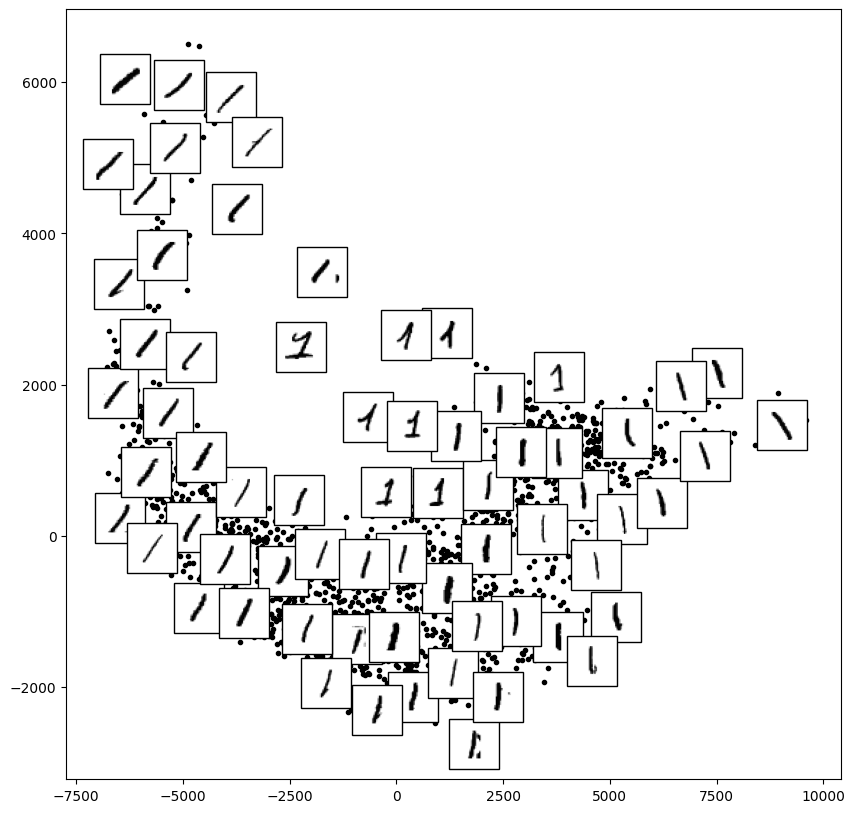

In [12]:
# Choose 1/4 of the "1" digits to project

data = mnist_data[mnist_target == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')